# Exploring Dandiset 001433: Breathing rhythm and place dataset

**Important Note:** This notebook was generated by an AI assistant. While it attempts to follow best practices and utilize available tools, it has not been fully verified. Users should carefully review the code and interpret results with caution.

## Dandiset Overview

This Dandiset, "Breathing rhythm and place dataset" (DANDI:001433), contains behavioral and electrophysiological data from recordings of sniffing, video, and olfactory bulb electrophysiology in freely-behaving mice. The recordings were taken from mice given no stimulus, reward, or task.

**Dandiset URL:** https://dandiarchive.org/dandiset/001433/0.250507.2356

**Description:** These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task.

**Keywords:** olfactory bulb, LFP, sniffing, mouse, neuroscience

**Contributors:** National Institutes of Health (NIH), Smear, Matt

**License:** CC-BY-4.0

## Notebook Summary

This notebook will guide you through accessing and exploring the data within Dandiset 001433. We will demonstrate how to:

1. Load the Dandiset using the DANDI API.
2. Load and inspect an NWB file from the Dandiset.
3. Summarize the structure and contents of the NWB file.
4. Load and visualize some of the physiological and behavioral data, specifically LFP and sniff signals.
5. Explore metadata associated with the data, such as electrode information.

The goal is to provide a starting point for researchers to interact with and analyze this dataset.

## Required Packages

To run this notebook, the following Python packages are required. Please ensure they are installed in your environment.

*   `dandi`
*   `pynwb`
*   `h5py`
*   `remfile`
*   `numpy`
*   `matplotlib`
*   `seaborn`
*   `pandas`

## Loading the Dandiset

We can connect to the DANDI archive and access information about the Dandiset using the `dandiapi` client.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## Loading an NWB File

This Dandiset contains several NWB files. We will load the file located at `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb` for demonstration purposes. We can construct the direct download URL for this asset using its ID.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use seaborn style for plots in this section
sns.set_theme()

# Hardcoded URL for the selected NWB file asset
url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"

# Load the remote NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Loaded NWB file: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")

# Close the IO object (important for resource management)
# io.close() # We don't need to close.

Loaded NWB file: 4122_4
Session description: LFP and sniff recording
Session start time: 2025-05-07 15:29:27.359523-07:00
Experimenter: ('Rafilson, Sidney',)


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Contents Summary

The loaded NWB file contains various types of neuroscience data. Here's a summary of the main containers and some of their key data fields, based on the output from `tools_cli.py nwb-file-info`:

*   **acquisition:** Contains raw acquired data.
   *   **LFP (ElectricalSeries):** Olfactory bulb LFP signal.
       *   `data`: The raw LFP data (shape: 1969184, 16) in volts.
       *   `rate`: Sampling rate (1000.0 Hz).
       *   `description`: "LFP signal from olfactory bulb".
       *   `electrodes`: Refers to the electrodes used for this recording.
   *   **SniffSignal (TimeSeries):** Raw sniff thermistor voltage.
       *   `data`: The raw sniff signal data (shape: 1969184,) in volts.
       *   `rate`: Sampling rate (1000.0 Hz).
       *   `description`: "Raw sniff thermistor voltage".
*   **processing:** Contains processed data.
   *   **behavior (ProcessingModule):** Sniff event features.
       *   **exhalation_time (TimeSeries):** Timestamps of exhalation events.
           *   `data`: Integer data related to exhalation (shape: 10030,).
           *   `timestamps`: Timestamps for exhalation events (shape: 10030,) in seconds.
           *   `description`: "exhalation_time (s)".
       *   **inhalation_time (TimeSeries):** Timestamps of inhalation events.
           *   `data`: Integer data related to inhalation (shape: 10030,).
           *   `timestamps`: Timestamps for inhalation events (shape: 10030,) in seconds.
           *   `description`: "inhalation_time (s)".
*   **electrode_groups:** Metadata about groups of electrodes.
   *   **LFPGroup (ElectrodeGroup):** Describes the LFP recording electrodes.
       *   `description`: "LFP recording electrodes".
       *   `location`: "Olfactory Bulb".
       *   `device`: Refers to the recording device.
*   **devices:** Metadata about recording devices.
   *   **OpenEphys (Device):** Description of the OpenEphys recording system.
*   **electrodes:** Dynamic table containing metadata for each electrode.
   *   `description`: "metadata about extracellular electrodes".
   *   `colnames`: ['location', 'group', 'group_name', 'filtering']
*   **subject:** Metadata about the experimental subject.
   *   `subject_id`: "4122"
   *   `species`: "Mus musculus"
   *   `sex`: "M"
   *   `age`: "P90D"
*   **keywords:** Keywords describing the NWB file content.

**Explore this NWB file on Neurosift:**

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356

## Exploring Data: LFP

The NWB file contains LFP data recorded from 16 channels in the olfactory bulb. Let's load and visualize a small segment of the LFP from a few channels. We will load the first 20000 time points (20 seconds, given a 1000 Hz rate) for channels 0, 4, and 8.

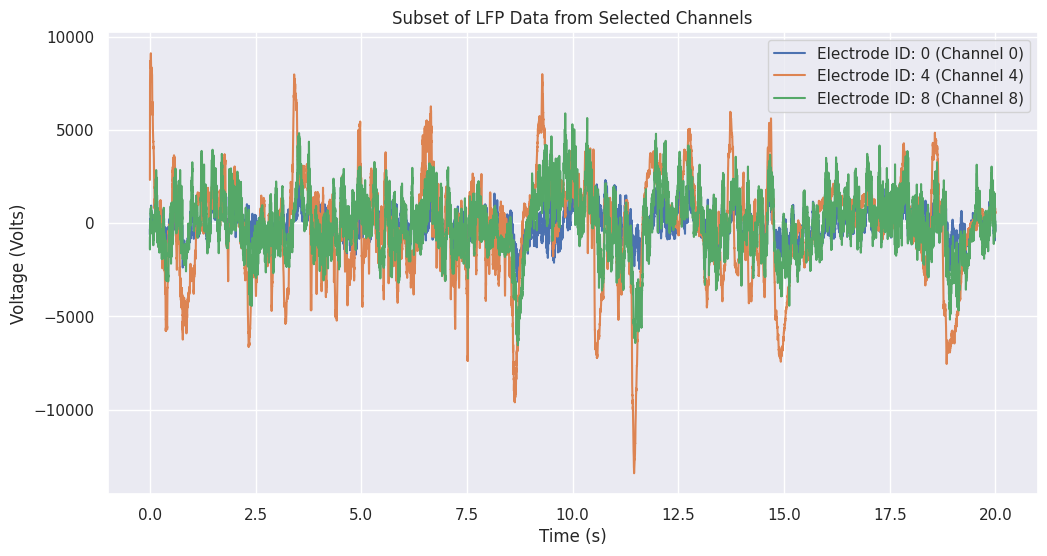

In [3]:
# Access the LFP data
lfp_data_interface = nwb.acquisition["LFP"]
lfp_data = lfp_data_interface.data # This is an h5py.Dataset, not a numpy array yet
lfp_rate = lfp_data_interface.rate
lfp_timestamps_start = lfp_data_interface.starting_time

# Load a subset of the LFP data (first 20000 time points for channels 0, 4, 8)
num_timepoints = 20000
channels_to_plot = [0, 4, 8]
lfp_subset = lfp_data[:num_timepoints, channels_to_plot] # [:] loads the data into memory

# Create corresponding time vector for the subset
lfp_time = np.linspace(lfp_timestamps_start, lfp_timestamps_start + (num_timepoints - 1) / lfp_rate, num_timepoints)

# Get electrode information for the plotted channels
electrodes_table = nwb.electrodes.to_dataframe()
electrode_ids = electrodes_table.iloc[channels_to_plot].index.values # Get the actual index values/IDs

 # Plot the LFP subset
plt.figure(figsize=(12, 6))
for i, channel_index in enumerate(channels_to_plot):
    plt.plot(lfp_time, lfp_subset[:, i], label=f'Electrode ID: {electrode_ids[i]} (Channel {channel_index})')

plt.xlabel("Time (s)")
plt.ylabel("Voltage (Volts)")
plt.title("Subset of LFP Data from Selected Channels")
plt.legend()
plt.show()

The plot shows the voltage fluctuations over time for the selected LFP channels. These signals represent the local field potential activity in the olfactory bulb. Note that we only loaded a small segment of the data to keep the notebook lightweight.

## Exploring Data: Sniff Signal

The NWB file also includes a raw sniff thermistor voltage signal, recorded concurrently with the LFP. Let's load and visualize a small segment of this sniff signal, corresponding to the same time period as the LFP data we plotted.

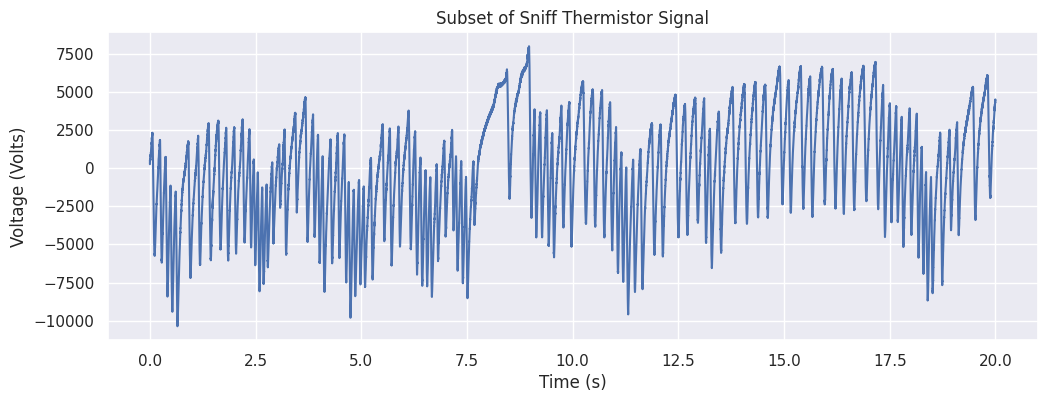

In [4]:
# Access the Sniff Signal data
sniff_data_interface = nwb.acquisition["SniffSignal"]
sniff_data = sniff_data_interface.data # This is an h5py.Dataset
sniff_rate = sniff_data_interface.rate
sniff_timestamps_start = sniff_data_interface.starting_time

# Load the corresponding subset of sniff data
sniff_subset = sniff_data[:num_timepoints] # [:] loads the data into memory

# Create corresponding time vector for the subset
sniff_time = np.linspace(sniff_timestamps_start, sniff_timestamps_start + (num_timepoints - 1) / sniff_rate, num_timepoints)

# Plot the sniff signal subset
plt.figure(figsize=(12, 4))
plt.plot(sniff_time, sniff_subset)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (Volts)")
plt.title("Subset of Sniff Thermistor Signal")
plt.show()

This plot shows the raw voltage output from the sniff thermistor over the same 20-second interval. Peaks and troughs in this signal correspond to inhalation and exhalation phases of breathing.

## Exploring Metadata: Electrodes

The `electrodes` table in the NWB file contains important metadata about each recording channel, such as location, group, and filtering. We can easily load this table into a pandas DataFrame for inspection.

In [5]:
# Load the electrodes table into a pandas DataFrame
electrodes_df = nwb.electrodes.to_dataframe()

# Display the first few rows of the DataFrame
print("Electrodes table (first 5 rows):")
print(electrodes_df.head())

# Display information about the DataFrame
print("\nElectrodes table information:")
electrodes_df.info()

# Display unique locations
print("\nUnique electrode locations:")
print(electrodes_df['location'].unique())

Electrodes table (first 5 rows):
          location                                              group  \
id                                                                      
0   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   
1   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   
2   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   
3   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   
4   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   

   group_name filtering  
id                       
0    LFPGroup      none  
1    LFPGroup      none  
2    LFPGroup      none  
3    LFPGroup      none  
4    LFPGroup      none  

Electrodes table information:
<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    16 non-null     object
 1   group       16 non-n

This table provides details for each of the 16 electrodes. We can see their location (`'Olfactory Bulb'`), the electrode group they belong to (`'LFPGroup'`), and filtering information. This metadata is crucial for understanding the origin and processing of the LFP signals.

## Combined Visualization: LFP and Sniff

To see the relationship between the LFP and sniff signals, we can plot them together on the same timeline for a shorter duration. Let's visualize the first 5 seconds of both signals.

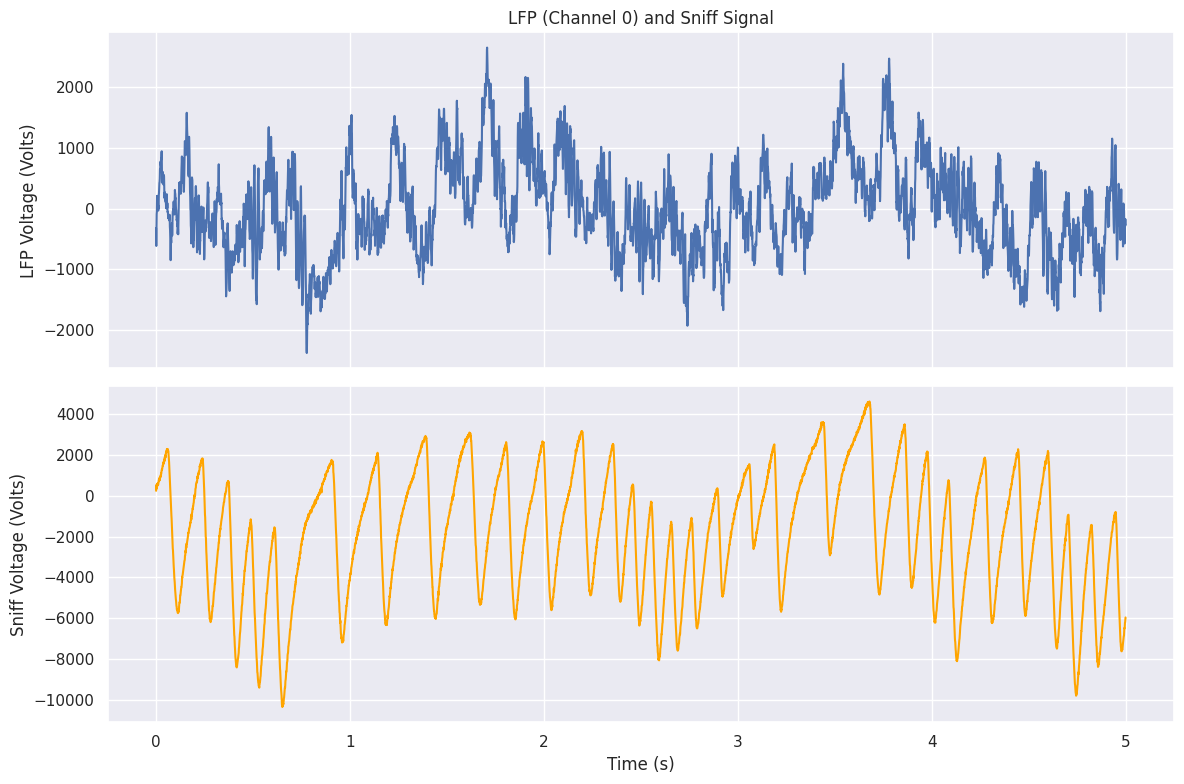

In [6]:
# Define duration for combined plot
plot_duration_seconds = 5
num_timepoints_combined = int(plot_duration_seconds * lfp_rate) # Assuming same rate for both

# Load a subset of LFP data for combined plot (channel 0)
lfp_subset_combined = lfp_data[:num_timepoints_combined, 0]

# Load a subset of Sniff data for combined plot
sniff_subset_combined = sniff_data[:num_timepoints_combined]

# Create corresponding time vector
time_combined = np.linspace(lfp_timestamps_start, lfp_timestamps_start + (num_timepoints_combined - 1) / lfp_rate, num_timepoints_combined)

# Create a figure with two subplots sharing the same time axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot LFP on the first subplot
ax1.plot(time_combined, lfp_subset_combined)
ax1.set_ylabel("LFP Voltage (Volts)")
ax1.set_title("LFP (Channel 0) and Sniff Signal")

# Plot Sniff Signal on the second subplot
ax2.plot(time_combined, sniff_subset_combined, color='orange')
ax2.set_ylabel("Sniff Voltage (Volts)")
ax2.set_xlabel("Time (s)")

# Improve layout and display plot
plt.tight_layout()
plt.show()

This combined plot shows how the LFP activity in the olfactory bulb relates to the animal's breathing cycle as measured by the sniff signal. Researchers can use this to investigate how breathing patterns influence olfactory processing.

## Summary and Future Directions

In this notebook, we have successfully accessed the Dandiset 001433, loaded one of its NWB files, and explored some of the key datasets: LFP and the raw sniff signal. We also inspected the electrode metadata.

This Dandiset provides valuable data for studying the relationship between breathing rhythms and neural activity in the olfactory system. Possible future directions for analysis could include:

*   Investigating the phase-amplitude coupling between the sniff signal and different frequency bands of the LFP.
*   Comparing LFP and sniffing patterns across different sessions or subjects within the Dandiset.
*   Utilizing kinematic or video data (if available in other NWB files within the Dandiset or associated with the sniff/LFP data) to relate neural and behavioral activity to the animal's movement and location.
*   Analyzing the `exhalation_time` and `inhalation_time` data within the `behavior` processing module to identify and analyze individual sniff cycles more formally.

In [7]:
# We don't need to close the file or connection explicitly in this notebook context.
# The resources will be released when the kernel stops or variables go out of scope.